In [64]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

 #Útil en:

#Comparaciones de variables en análisis de datos, creación de combinaciones para modelos, evaluación de correlaciones entre pares de variables
#------------------------------------------------------------------------

from itertools import combinations

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest




# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [65]:
df = pd.read_csv("files/masculinity-survey.csv",index_col=0) 
df.sample(10)


,Unnamed: 1,Adult Men,Age,Unnamed: 4,Unnamed: 5,Race,Unnamed: 7,Children,Unnamed: 9,Sexual Orientation,Unnamed: 11
AMONG ADULT MEN,,,,,,,,,,,
How important is it to you that others see you as masculine?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
See a therapist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Men have more choice,16%,NaN,12%,21%,13%,20%,14%,18%,15%,NaN
Do you typically feel as though you're expected to make the first move in romantic relationships?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Over the past 12 months, when it comes to sexual boundaries, which of the following things have you done? (Select all that apply.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Yes,13%,23%,9%,7%,9%,20%,9%,16%,12%,18%
NaN,Your clothing or style,18%,31%,15%,9%,15%,26%,12%,26%,16%,40%
NaN,"Never, and not open to it",11%,16%,10%,9%,11%,13%,7%,17%,6%,47%
NaN,You didn't want to get involved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, nan to nan
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 1          195 non-null    object
 1   Adult Men           189 non-null    object
 2   Age                 155 non-null    object
 3   Unnamed: 4          190 non-null    object
 4   Unnamed: 5          190 non-null    object
 5   Race                190 non-null    object
 6   Unnamed: 7          190 non-null    object
 7   Children            190 non-null    object
 8   Unnamed: 9          190 non-null    object
 9   Sexual Orientation  190 non-null    object
 10  Unnamed: 11         155 non-null    object
dtypes: object(11)
memory usage: 21.8+ KB


In [119]:
df1 = pd.read_csv("files/raw-responses.csv",index_col=0) 
df1.head(5)

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,No,Yes,So

In [72]:
df1["advantage_of_being_a_man_more_promotion_opportunities"].value_counts()

advantage_of_being_a_man_more_promotion_opportunities
Not selected                                                      734
Men have more promotion/professional development opportunities    146
Name: count, dtype: int64

##### Cambiar nombre de columnas

In [120]:
rename_dict = {
    "StartDate": "start_date",
    "EndDate": "end_date",
    "q0001": "self_perceived_masculinity",
    "q0002": "importance_of_being_seen_as_masculine",
    
    # Q4: Sources of masculinity (multirespuesta)
    "q0004_0001": "source_of_masculinity_father_figure",
    "q0004_0002": "source_of_masculinity_mother_figure",
    "q0004_0003": "source_of_masculinity_family_members",
    "q0004_0004": "source_of_masculinity_pop_culture",
    "q0004_0005": "source_of_masculinity_friends",
    "q0004_0006": "source_of_masculinity_other",

    "q0005": "societal_pressure_on_men",

    # Q7: Lifestyle frequency (multirespuesta)
    "q0007_0001": "lifestyle_ask_friend_professional_advice",
    "q0007_0002": "lifestyle_ask_friend_personal_advice",
    "q0007_0003": "lifestyle_show_affection_to_male_friends",
    "q0007_0004": "lifestyle_crying",
    "q0007_0005": "lifestyle_physical_fight",
    "q0007_0006": "lifestyle_sexual_relations_with_women",
    "q0007_0007": "lifestyle_sexual_relations_with_men",
    "q0007_0008": "lifestyle_watch_sports",
    "q0007_0009": "lifestyle_work_out",
    "q0007_0010": "lifestyle_see_therapist",
    "q0007_0011": "lifestyle_feel_lonely_or_isolated",

    # Q8: Daily worries (multirespuesta)
    "q0008_0001": "daily_worry_height",
    "q0008_0002": "daily_worry_weight",
    "q0008_0003": "daily_worry_hair",
    "q0008_0004": "daily_worry_physique",
    "q0008_0005": "daily_worry_genitalia",
    "q0008_0006": "daily_worry_clothing_style",
    "q0008_0007": "daily_worry_sexual_performance",
    "q0008_0008": "daily_worry_mental_health",
    "q0008_0009": "daily_worry_physical_health",
    "q0008_0010": "daily_worry_finances",
    "q0008_0011": "daily_worry_provide_for_family",
    "q0008_0012": "daily_worry_none",

    "q0009": "employment_status",

    # Q10: Advantages of being a man at work (multirespuesta)
    "q0010_0001": "advantage_of_being_a_man_more_money",
    "q0010_0002": "advantage_of_being_a_man_taken_more_seriously",
    "q0010_0003": "advantage_of_being_a_man_more_choice",
    "q0010_0004": "advantage_of_being_a_man_more_promotion_opportunities",
    "q0010_0005": "advantage_of_being_a_man_praised_more",
    "q0010_0006": "advantage_of_being_a_man_more_manager_support",
    "q0010_0007": "advantage_of_being_a_man_other",
    "q0010_0008": "advantage_of_being_a_man_none",

    # Q11: Disadvantages (multirespuesta)
    "q0011_0001": "disadvantage_of_being_a_man_hiring_promoting_women",
    "q0011_0002": "disadvantage_of_being_a_man_risk_accusation_harassment",
    "q0011_0003": "disadvantage_of_being_a_man_risk_accusation_bias",
    "q0011_0004": "disadvantage_of_being_a_man_other",
    "q0011_0005": "disadvantage_of_being_a_man_none",

    # Q12: Response to harassment (multirespuesta)
    "q0012_0001": "response_to_harassment_confronted_accused",
    "q0012_0002": "response_to_harassment_contacted_hr",
    "q0012_0003": "response_to_harassment_contacted_manager",
    "q0012_0004": "response_to_harassment_supported_victim",
    "q0012_0005": "response_to_harassment_did_nothing",
    "q0012_0006": "response_to_harassment_never_witnessed",
    "q0012_0007": "response_to_harassment_other",

    "q0013": "reason_for_no_response",

    "q0014": "heard_about_metoo",
    "q0015": "behavior_changed_at_work_due_to_metoo",

    # Q17–Q18: Romantic dynamics
    "q0017": "expected_to_make_first_move",
    "q0018": "how_often_pay_on_date",

    # Q19: Reasons for paying on a date (multirespuesta)
    "q0019_0001": "reason_for_paying_on_date_right_thing",
    "q0019_0002": "reason_for_paying_on_date_earn_more",
    "q0019_0003": "reason_for_paying_on_date_feel_good",
    "q0019_0004": "reason_for_paying_on_date_societal_expectations",
    "q0019_0005": "reason_for_paying_on_date_obligation_for_asking_out",
    "q0019_0006": "reason_for_paying_on_date_test_response",
    "q0019_0007": "reason_for_paying_on_date_other",

    # Q20: Gauging interest (multirespuesta)
    "q0020_0001": "gauge_interest_by_body_language",
    "q0020_0002": "gauge_interest_by_verbal_consent",
    "q0020_0003": "gauge_interest_by_physical_move",
    "q0020_0004": "gauge_interest_situation_different",
    "q0020_0005": "gauge_interest_unclear",
    "q0020_0006": "gauge_interest_other",

    # Q21: Boundaries (multirespuesta)
    "q0021_0001": "boundary_wondered_if_pushed_too_far",
    "q0021_0002": "boundary_discussed_with_friends",
    "q0021_0003": "boundary_contacted_past_partner",
    "q0021_0004": "boundary_none_above",

    "q0022": "changed_behavior_in_relationships_due_to_metoo",

    "q0024": "marital_status",
    "q0025_0001": "has_children_under_18",
    "q0025_0002": "has_children_over_18",
    "q0025_0003": "no_children",

    "q0026": "sexual_orientation",
    "q0028": "race",
    "q0029": "education_level",
    "q0030": "state",

    # Demographic extended data
    "q0034": "income_bracket",
    "q0035": "us_region",  # Renombrado para reflejar las regiones de EE.UU.
    "q0036": "device_and_os_usage",  # Renombrado para reflejar los dispositivos y sistemas operativos.
    "race2": "race_classification",  # Renombrado para reflejar la clasificación racial.
    "racethn4": "race_and_ethnicity_detailed",  # Renombrado para reflejar detalles de raza y etnia.
    "educ3": "education_level_grouped",  # Renombrado para reflejar el nivel educativo general.
    "educ4": "education_level_detailed",  # Renombrado para reflejar los detalles del nivel educativo.
    "age3": "age_group",
    "kids": "has_kids",
    "orientation": "sexual_orientation_label",
    "weight": "response_weight"
}


In [121]:
df1.rename(columns=rename_dict, inplace=True)


##### Tratar columnas multirespuestas 🚩🚩

In [122]:
# Definir la lista de columnas a procesar
columns_to_process = [
    "daily_worry_height", "daily_worry_weight", "daily_worry_hair", "daily_worry_physique",
    "daily_worry_genitalia", "daily_worry_clothing_style", "daily_worry_sexual_performance",
    "daily_worry_mental_health", "daily_worry_physical_health", "daily_worry_finances",
    "daily_worry_provide_for_family", "daily_worry_none"
]

# Definir el valor que representa "no seleccionado"
not_selected_value = "Not selected"

# Convertir las respuestas de las columnas en valores binarios
for col in columns_to_process:
    df1[col] = df1[col].apply(lambda x: 1 if x != not_selected_value else 0)


In [123]:
# Contar el número de preocupaciones seleccionadas por cada encuestado
df1['total_worries'] = df1[columns_to_process].sum(axis=1)



In [124]:
df1.head()

,start_date,end_date,self_perceived_masculinity,importance_of_being_seen_as_masculine,source_of_masculinity_father_figure,source_of_masculinity_mother_figure,source_of_masculinity_family_members,source_of_masculinity_pop_culture,source_of_masculinity_friends,source_of_masculinity_other,societal_pressure_on_men,lifestyle_ask_friend_professional_advice,lifestyle_ask_friend_personal_advice,lifestyle_show_affection_to_male_friends,lifestyle_crying,lifestyle_physical_fight,lifestyle_sexual_relations_with_women,lifestyle_sexual_relations_with_men,lifestyle_watch_sports,lifestyle_work_out,lifestyle_see_therapist,lifestyle_feel_lonely_or_isolated,daily_worry_height,daily_worry_weight,daily_worry_hair,daily_worry_physique,daily_worry_genitalia,daily_worry_clothing_style,daily_worry_sexual_performance,daily_worry_mental_health,daily_worry_physical_health,daily_worry_finances,daily_worry_provide_for_family,daily_worry_none,employment_status,advantage_of_being_a_man_more_money,advantage_of_being_a_man_taken_more_seriously,advantage_of_being_a_man_more_choice,advantage_of_being_a_man_more_promotion_opportunities,advantage_of_being_a_man_praised_more,advantage_of_being_a_man_more_manager_support,advantage_of_being_a_man_other,advantage_of_being_a_man_none,disadvantage_of_being_a_man_hiring_promoting_women,disadvantage_of_being_a_man_risk_accusation_harassment,disadvantage_of_being_a_man_risk_accusation_bias,disadvantage_of_being_a_man_other,disadvantage_of_being_a_man_none,response_to_harassment_confronted_accused,response_to_harassment_contacted_hr,response_to_harassment_contacted_manager,response_to_harassment_supported_victim,response_to_harassment_did_nothing,response_to_harassment_never_witnessed,response_to_harassment_other,reason_for_no_response,heard_about_metoo,behavior_changed_at_work_due_to_metoo,expected_to_make_first_move,how_often_pay_on_date,reason_for_paying_on_date_right_thing,reason_for_paying_on_date_earn_more,reason_for_paying_on_date_feel_good,reason_for_paying_on_date_societal_expectations,reason_for_paying_on_date_obligation_for_asking_out,reason_for_paying_on_date_test_response,reason_for_paying_on_date_other,gauge_interest_by_body_language,gauge_interest_by_verbal_consent,gauge_interest_by_physical_move,gauge_interest_situation_different,gauge_interest_unclear,gauge_interest_other,boundary_wondered_if_pushed_too_far,boundary_discussed_with_friends,boundary_contacted_past_partner,boundary_none_above,changed_behavior_in_relationships_due_to_metoo,marital_status,has_children_under_18,has_children_over_18,no_children,sexual_orientation,race,education_level,state,income_bracket,us_region,device_and_os_usage,race_classification,race_and_ethnicity_detailed,education_level_grouped,education_level_detailed,age_group,has_kids,sexual_orientation_label,response_weight,total_worries
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,0,0,1,0,0,0,0,0,1,1,0,0,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,3
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes

In [87]:
# Guardar el DataFrame con los cambios en un nuevo archivo CSV
df.to_csv('transformed_responses.csv', index=False)


##### Función crear columna con multirespuestas ❓❓❓ NO SE VA UTILIZAR DE MOMENTO(PENDIENTE DE BORRAR)

In [ ]:
#def combine_columns(df, columns, new_column_name):
 """
    Combina columnas de preocupaciones diarias en una sola columna,
    eliminando los valores 'Not selected'.

    Parámetros:
    - df: DataFrame de pandas
    - columns: lista de nombres de columnas a combinar
    - new_column_name: nombre de la nueva columna combinada (por defecto "daily_worries")

    Retorna:
    - El DataFrame con la nueva columna agregada
    """
 #   df[new_column_name] = df[columns].apply( lambda row: ''.join(val.replace("Not selected", "") for val in row.astype(str)), axis=1)
   
   # return df.head()


In [ ]:
#columns = [

#"daily_worry_height",
#"daily_worry_weight",
#"daily_worry_hair",
#"daily_worry_physique",
#"daily_worry_genitalia",
#"daily_worry_clothing_style",
#"daily_worry_sexual_performance",
# "daily_worry_mental_health",
#"daily_worry_physical_health",
#"daily_worry_finances",
#"daily_worry_provide_for_family",
# "daily_worry_none"]

#combine_columns(df1, columns,"daily_worries")



### VISUALIZACION👓

##### Masculinidad👨

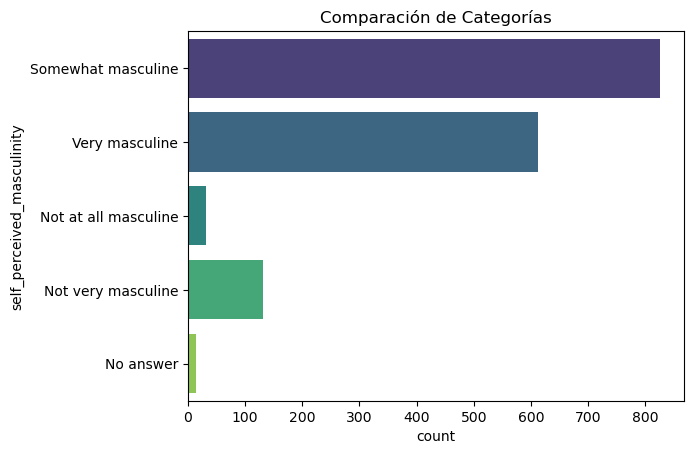

In [40]:
sns.countplot(y= "self_perceived_masculinity", data=df1, palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

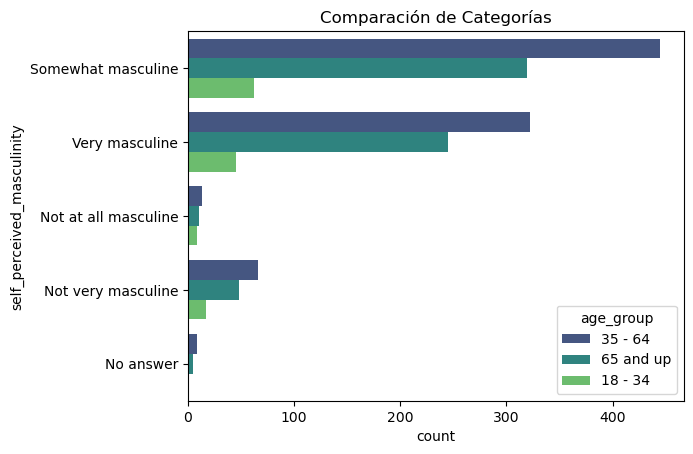

In [41]:
sns.countplot(y= "self_perceived_masculinity", data=df1,hue="age_group", palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

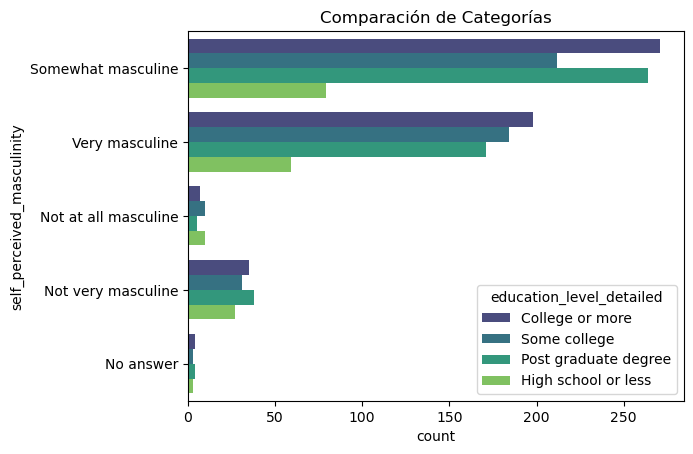

In [42]:
sns.countplot(y= "self_perceived_masculinity", data=df1,hue="education_level_detailed", palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

##### Worries😥

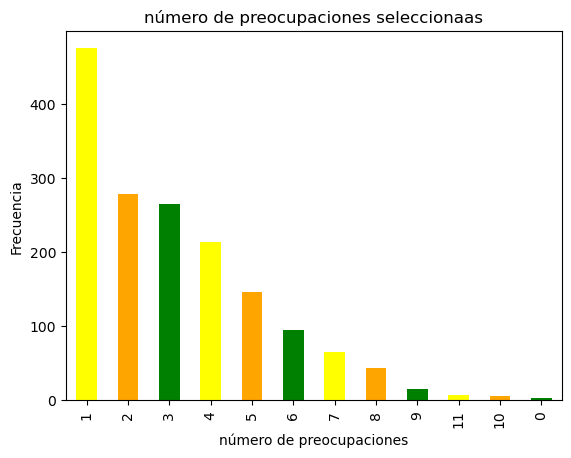

In [99]:

df1['total_worries'].value_counts().plot(kind='bar', color=["yellow","orange","green"])

# Título y ajustes
plt.title("número de preocupaciones seleccionaas")
plt.xlabel("número de preocupaciones")
plt.ylabel("Frecuencia")

# Mostrar la gráfica
plt.show()


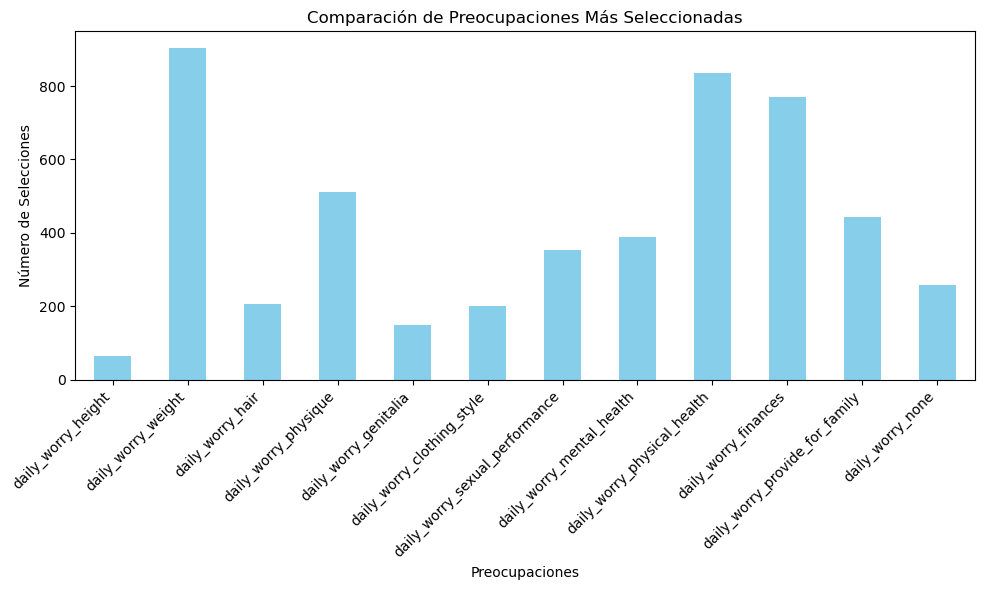

In [ ]:


# Contar cuántas veces se seleccionó "1" (preocupación) en cada columna
selection_counts = df1[columns_to_process].sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
selection_counts.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title("Comparación de Preocupaciones Más Seleccionadas")
plt.xlabel("Preocupaciones")
plt.ylabel("Número de Selecciones")
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para que no se solapen

# Mostrar la gráfica
plt.tight_layout()  # Asegura que todo el texto y etiquetas se vean bien
plt.show()


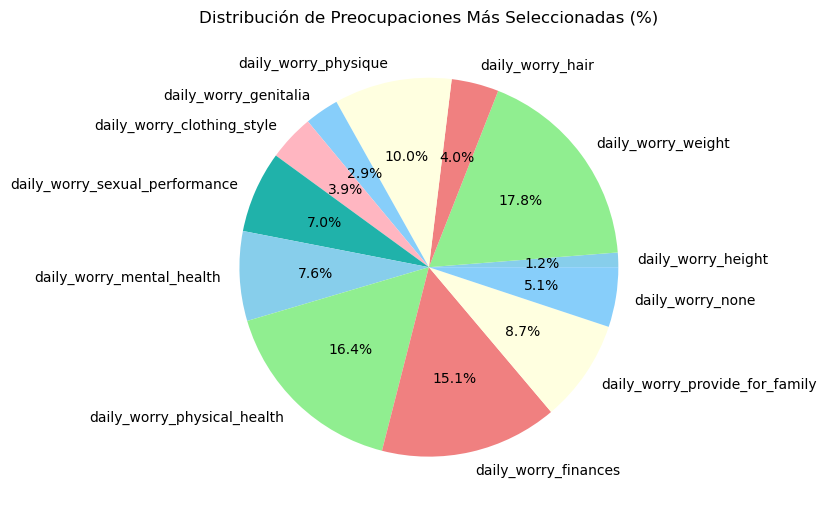

In [ ]:
selection_percentages = df1[columns_to_process].mean() * 100
# Crear un gráfico circular (pie chart) para los porcentajes
plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura
selection_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightskyblue', 'lightpink', 'lightseagreen'])

# Añadir título
plt.title("Distribución de Preocupaciones Más Seleccionadas (%)")

# Mostrar la gráfica
plt.tight_layout()  # Asegura que todo el texto y etiquetas se vean bien
plt.show()
